In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

df = pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [6]:
df.shape

(9994, 21)

In [7]:
print('The most recent Order Date is:',df['Order Date'].max())
print('The first Order Date is:',df['Order Date'].min())

The most recent Order Date is: 2017-12-30 00:00:00
The first Order Date is: 2014-01-03 00:00:00


In [8]:
df['Recency'] = (datetime.now().date() - df['Order Date'].dt.date).dt.days
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency
3910,3911,CA-2015-167010,2015-04-05,2015-04-10,Standard Class,VT-21700,Valerie Takahito,Home Office,United States,Philadelphia,Pennsylvania,19143,East,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,352.450,5,0.5,-211.4700,3280
542,543,US-2015-120161,2015-12-18,2015-12-23,Standard Class,LM-17065,Liz MacKendrick,Consumer,United States,Springfield,Ohio,45503,East,OFF-ST-10001809,Office Supplies,Storage,Fellowes Officeware Wire Shelving,646.776,9,0.2,-145.5246,3023
968,969,CA-2017-135279,2017-04-09,2017-04-11,First Class,BS-11800,Bryan Spruell,Home Office,United States,New York City,New York,10011,East,OFF-LA-10001613,Office Supplies,Labels,Avery File Folder Labels,8.640,3,0.0,4.2336,2545
4051,4052,CA-2014-122931,2014-09-29,2014-10-03,Standard Class,SM-20950,Suzanne McNair,Corporate,United States,Philadelphia,Pennsylvania,19134,East,OFF-AR-10003469,Office Supplies,Art,Nontoxic Chalk,4.224,3,0.2,1.4784,3468
573,574,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,3,0.0,4.0095,2282


In [9]:
frequency_data = df.groupby("Customer ID")['Order ID'].count().reset_index()
frequency_data.rename(columns= {'Order ID': 'Frequency'}, inplace = True)
df = df.merge(frequency_data, on = 'Customer ID', how = 'left')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Frequency
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2697,5
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2697,5
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2846,9
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3091,15
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3091,15


In [10]:
monetary_data = df.groupby('Customer ID')['Sales'].sum().reset_index()
monetary_data.rename(columns={'Sales': 'MonetaryValue'}, inplace = True)
df = df.merge(monetary_data, on = 'Customer ID', how = 'left')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Frequency,MonetaryValue
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2697,5,1148.7800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2697,5,1148.7800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2846,9,1119.4830
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3091,15,2602.5755
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3091,15,2602.5755


In [11]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4 ,5]

#Cut function is used to separate the array elements into different bins
df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels= recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5, labels= frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins= 5, labels= monetary_scores)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2697,5,1148.7800,4,1,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2697,5,1148.7800,4,1,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2846,9,1119.4830,4,2,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3091,15,2602.5755,3,2,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,3091,15,2602.5755,3,2,1


In [12]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country         9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [14]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q= 3, labels= segment_labels)
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
9733,9734,CA-2014-114321,2014-08-20,2014-08-25,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,Hampton,Virginia,23666,South,OFF-PA-10000246,Office Supplies,Paper,Riverleaf Stik-Withit Designer Note Cubes,20.120,2,0.0,9.2552,3508,15,8241.739,1,2,2,5,Low-Value
7050,7051,CA-2016-165330,2016-12-11,2016-12-11,Same Day,WB-21850,William Brown,Consumer,United States,Anaheim,California,92804,West,OFF-BI-10004593,Office Supplies,Binders,Ibico Laser Imprintable Binding System Covers,209.600,5,0.2,68.1200,2664,37,6160.102,4,5,2,11,High-Value
4481,4482,CA-2016-109365,2016-11-03,2016-11-08,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Los Angeles,California,90049,West,OFF-AP-10002998,Office Supplies,Appliances,Holmes 99% HEPA Air Purifier,43.320,2,0.0,14.2956,2702,28,2374.658,4,4,1,9,High-Value
6546,6547,US-2017-154872,2017-05-14,2017-05-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Cleveland,Ohio,44105,East,OFF-PA-10000483,Office Supplies,Paper,Xerox 19,24.784,1,0.2,7.7450,2510,17,1050.636,5,3,1,9,High-Value
4260,4261,CA-2017-164819,2017-10-15,2017-10-19,Second Class,RS-19420,Ricardo Sperren,Corporate,United States,Fairfield,Connecticut,6824,East,OFF-LA-10001045,Office Supplies,Labels,Permanent Self-Adhesive File Folder Labels for...,13.050,5,0.0,6.0030,2356,9,3221.290,5,2,1,8,Mid-Value


In [15]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']
segment_counts.head()

,Value Segment,Count
0,Mid-Value,4186
1,Low-Value,3579
2,High-Value,2229


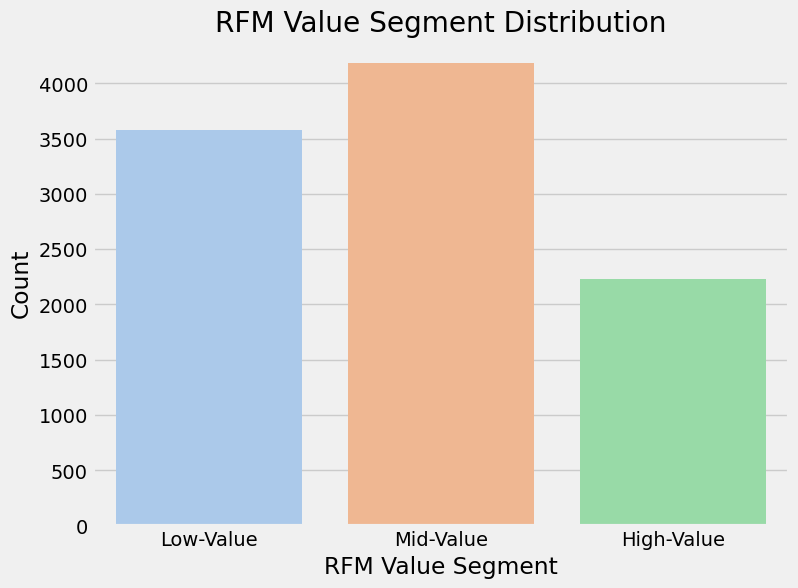

In [16]:
pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(8,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)

plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')


plt.show()

In [17]:
df['RFM Customer Segments'] = ''

df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cannot Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'

df[['Customer ID', 'RFM Customer Segments']]

,Customer ID,RFM Customer Segments
0,CG-12520,Potential Loyalists
1,CG-12520,Potential Loyalists
2,DV-13045,Potential Loyalists
3,SO-20335,Potential Loyalists
4,SO-20335,Potential Loyalists
...,...,...
9989,TB-21400,Potential Loyalists
9990,DB-13060,Potential Loyalists
9991,DB-13060,Potential Loyalists
9992,DB-13060,Potential Loyalists


In [18]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name = 'Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
segment_product_counts = segment_product_counts[segment_product_counts['Count'] > 1]
segment_product_counts

,Value Segment,RFM Customer Segments,Count
9,Mid-Value,Potential Loyalists,4186
12,High-Value,Champions,2229
4,Low-Value,Potential Loyalists,1604
0,Low-Value,At Risk Customers,1105
1,Low-Value,Cannot Lose,695
3,Low-Value,Lost,175


In [19]:
!pip install squarify

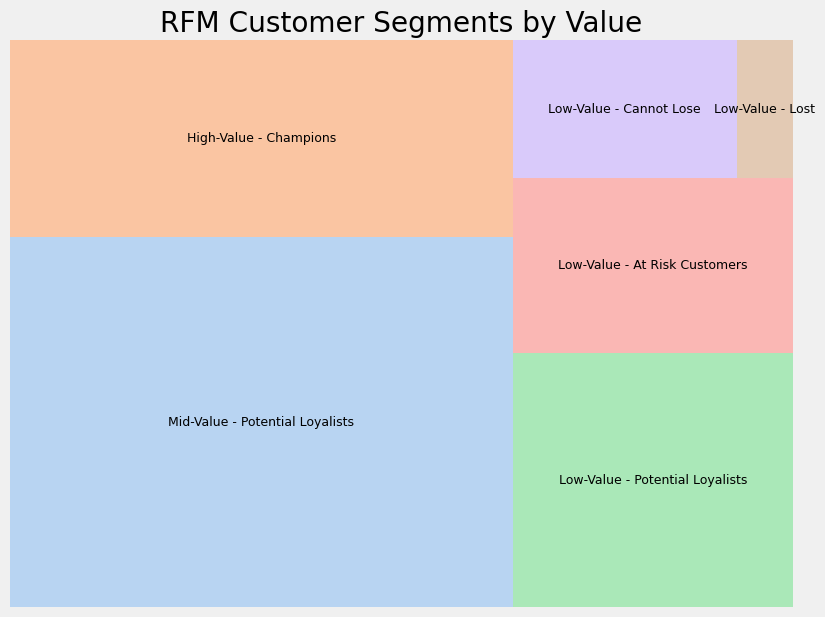

In [20]:
import matplotlib.pyplot as plt
import squarify

# Set up the figure size
plt.figure(figsize=(9, 7))

# Plot the treemap with adjusted label placement and font size
squarify.plot(sizes=segment_product_counts['Count'],
              label=segment_product_counts.apply(lambda x: f"{x['Value Segment']} - {x['RFM Customer Segments']}", axis=1),
              color=pastel_colors,
              alpha=0.7,
              text_kwargs={'fontsize': 9, 'horizontalalignment': 'center', 'verticalalignment': 'center'})

# Add title and hide axis
plt.title('RFM Customer Segments by Value')
plt.axis('off')

# Show the plot
plt.show()


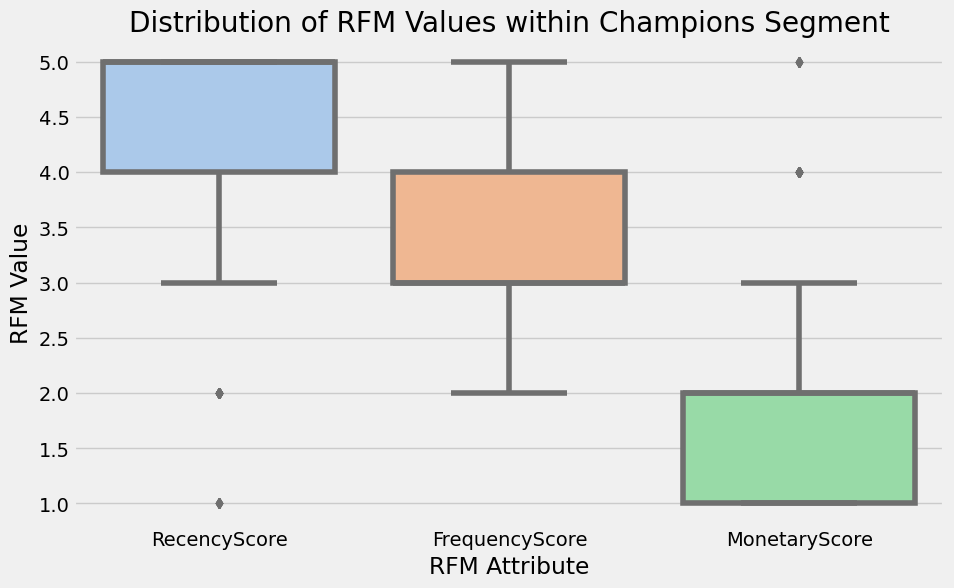

In [21]:
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

plt.figure(figsize= (10,6))
sns.boxplot(data = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')

plt.title('Distribution of RFM Values within Champions Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

plt.show()

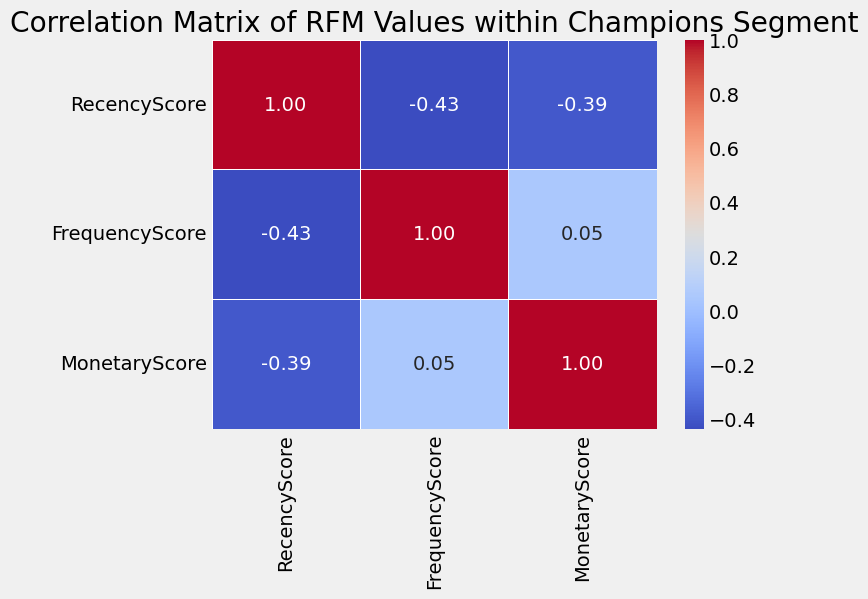

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Create the heatmap with annotations
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of RFM Values within Champions Segment')

# Show the plot
plt.show()


In [23]:
segment_counts = df['RFM Customer Segments'].value_counts()
segment_counts

Potential Loyalists    5790
Champions              2229
At Risk Customers      1105
Cannot Lose             695
Lost                    175
Name: RFM Customer Segments, dtype: int64

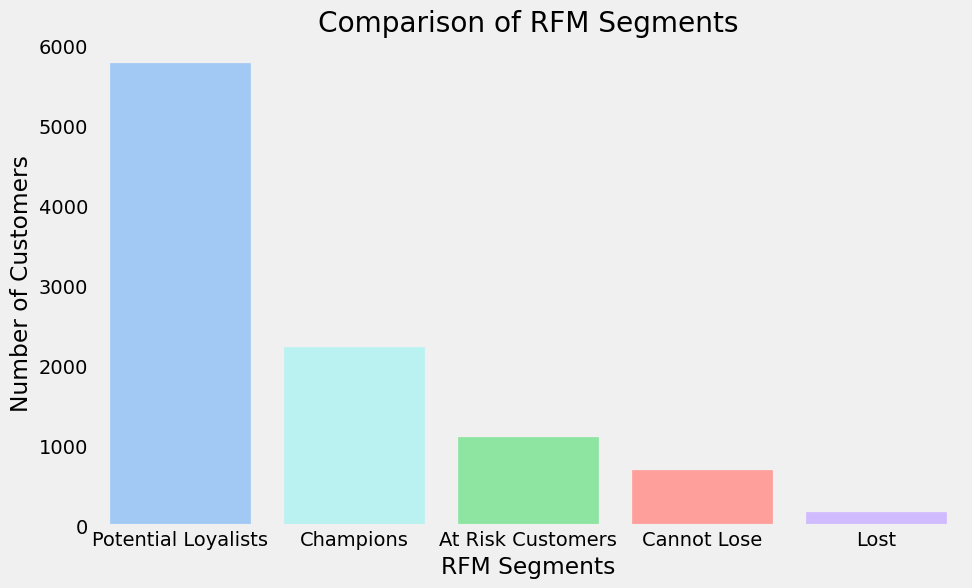

In [24]:
segment_counts = df['RFM Customer Segments'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')

champions_color = pastel_colors[9]
colors = [champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)]
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

ax.yaxis.grid(False)

plt.show()